### COMS4060A/7056A: Assignment #1
**University of the Witwatersrand**  
**Lecturer:** Muhammad Nasir (<muhammad.nasir@wits.ac.za>)  
**Date:** August 2025

---

**Group Name:** *Visionaries*

**Members**
- Karabo Mohapeloa
- Taruna Naidoo
- Humani Nenzhelele - *1602841@students.wits.ac.za*
- Daniel Ngobe


## 1. Data Cleaning

This dataset relies heavily on user input from around the world. Expect issues such as:
- **`date fueled`** sometimes containing free-text descriptions instead of dates.
- **Numeric fields** (e.g., `gallons`, `miles`, `odometer`) written with thousands separators (e.g., `1,523.50`) that must be cleaned before conversion.
- **Cost fields** (`cost per gallon`, `total spent`) that include currency symbols (e.g., `R500`, `$500`) across many currencies.

### 1.1 Date Fields
1. Identify the **percentage of `date fueled` entries that are not valid dates**. **[1]**  
2. Where `date fueled` is invalid but **`date captured` is valid**, **fill** `date fueled` with `date captured` as a proxy. **[1]**  
3. **Convert** `date fueled` to a date type; set any invalid entries to **NaT**. **[2]**  
4. **Remove dates** that are in the **future** or **earlier than 2005**. **[1]**  
5. **Plot the distribution** of fueling dates and **comment** on the results. **[2]**



In [3]:
pip install ydata_profiling

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/676.2 kB ? eta -:--:--
   --------------- ------------------------ 262.1/676.2 kB ? eta -:--:--
   ---------------------------------------- 676.2/676.2 kB 2.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=c53ec690aac679b61b30a952da6ce22180e719bc5d1892a18a52557668d8ad6a
  Stored in directory: c:\users\humaninenzhelele\appdata\local\pip\cache\wheels\5f\d4\d7\4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import missingno

In [5]:
from ydata_profiling import ProfileReport

In [6]:
import pandas as pd
import re

df = pd.read_csv(
    "logbook_assignment1.csv",
    low_memory=False  # avoids the warning, but doesn't fix dirty values
)

df.shape

(1174870, 9)

In [ ]:
profile = ProfileReport(df)
profile 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [05:22<00:00, 35.88s/it]


## 1.1 Date Fields

1. Identify what percentage of `date_fueled` entries are not proper dates. **[1]**

In [64]:
df.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,date_fueled_parsed,date_fueled_clean,date_format_type,is_valid_date,date_captured_parsed,date_fueled_final,used_proxy,date_fueled_cleaned
0,"Cooling System, Heating System, Lights, Spark ...",Apr 7 2022,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,NaT,"Cooling System, Heating System, Lights, Spark ...",Other,False,2022-04-07,2022-04-07,True,NaT
1,Nov 7 2012,Aug 30 2016,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,2012-11-07,Nov 7 2012,Mon_DD_YYYY,True,2016-08-30,2012-11-07,False,2012-11-07
2,Sep 22 2012,Sep 28 2012,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,2012-09-22,Sep 22 2012,Mon_DD_YYYY,True,2012-09-28,2012-09-22,False,2012-09-22
3,May 4 2019,May 4 2019,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,2019-05-04,May 4 2019,Mon_DD_YYYY,True,2019-05-04,2019-05-04,False,2019-05-04
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,2022-02-15,Feb 15 2022,Mon_DD_YYYY,True,2022-02-15,2022-02-15,False,2022-02-15


In [68]:
pd.DataFrame(df['date_fueled'].value_counts()).tail(50)

,count
date_fueled,
Shell 87 Octane - Debit - Vernon,1
Parts Source\n\nLR Rotor\nLR Wheel Hub\nBrake Pads,1
Costco i-10 bunker hill,1
"Differential Fluid, Engine Antifreeze, Spark Plugs, Transmission Fluid",1
Tires wearing good,1
EVIC 11.1\r\nOkahandja Windhoek,1
ZX Premium 95 octane.,1
Caltex. Rietfontein Road. Boksburg,1
"New Compressor, Filter Drier, Serpentine Belt",1


In [24]:
# Make sure it's string and strip spaces
df['date_fueled_clean'] = df['date_fueled'].astype(str).str.strip()


In [29]:
import pandas as pd
import re

# 1. Clean text
df['date_fueled_clean'] = df['date_fueled'].astype(str).str.strip()

# 2. Detect format type
def detect_format(val):
    if re.match(r'^[A-Za-z]{3} \d{1,2} \d{4}$', val):   # "Nov 15 2020"
        return "Mon_DD_YYYY"
    elif re.match(r'^\d{1,2}/\d{1,2}/\d{4}$', val):     # "15/11/2020" or "11/15/2020"
        return "Slash_Date"
    else:
        return "Other"

df['date_format_type'] = df['date_fueled_clean'].apply(detect_format)

# 3. Parse dates
df['date_fueled_parsed'] = pd.NaT
df.loc[df['date_format_type']=="Mon_DD_YYYY", 'date_fueled_parsed'] = pd.to_datetime(
    df.loc[df['date_format_type']=="Mon_DD_YYYY", 'date_fueled_clean'],
    format="%b %d %Y", errors="coerce"
)
df.loc[df['date_format_type']=="Slash_Date", 'date_fueled_parsed'] = pd.to_datetime(
    df.loc[df['date_format_type']=="Slash_Date", 'date_fueled_clean'],
    dayfirst=True, errors="coerce"   # change to False if US-style
)

# 4. Flag valid vs invalid
df['is_valid_date'] = df['date_fueled_parsed'].notna()

# 5. Summary
invalid_count = (~df['is_valid_date']).sum()
total_count = len(df)
percentage_invalid = (invalid_count / total_count) * 100

print(f"Invalid entries: {invalid_count}")
print(f"Total entries: {total_count}")
print(f"Percentage invalid: {percentage_invalid:.2f}%")


Invalid entries: 137208
Total entries: 1174870
Percentage invalid: 11.68%


2. If `date_fueled` is not entered correctly (or is not a date), and the `date_captured` is a valid date, then fill in this value as a proxy. **[1]**

In [33]:
import pandas as pd
import numpy as np

# Step 1: Clean
df['date_fueled_clean'] = df['date_fueled'].astype(str).str.strip()

# Step 2: Remove obvious junk (numbers with decimals or 'H')
mask_junk = df['date_fueled_clean'].str.contains(r'\d+\.\d+|H', na=False)
df.loc[mask_junk, 'date_fueled_clean'] = np.nan

# Step 3: First pass (Mon DD YYYY, e.g. "Nov 15 2020")
fueled1 = pd.to_datetime(
    df['date_fueled_clean'],
    format="%b %d %Y",
    errors="coerce"
)

# Step 4: Second pass only for unparsed rows, with strict slash format
mask_fueled = fueled1.isna()
fueled2 = pd.to_datetime(
    df.loc[mask_fueled, 'date_fueled_clean'],
    format="%d/%m/%Y",    # adjust if your data is US-style
    errors="coerce"
)

# Combine
fueled1.loc[mask_fueled] = fueled2
df['date_fueled_parsed'] = fueled1


In [34]:
# Parse date_captured safely (assuming Mon DD YYYY)
df['date_captured_parsed'] = pd.to_datetime(
    df['date_captured'], 
    format="%b %d %Y", 
    errors="coerce"
)

# Fill missing date_fueled with date_captured
df['date_fueled_final'] = df['date_fueled_parsed'].fillna(df['date_captured_parsed'])

# Flag rows where proxy was used
df['used_proxy'] = df['date_fueled_parsed'].isna() & df['date_captured_parsed'].notna()


In [36]:
# Report
total = len(df)
valid_direct = df['date_fueled_parsed'].notna().sum()
filled_proxy = df['used_proxy'].sum()
still_invalid = df['date_fueled_final'].isna().sum()

pct_valid_direct = (valid_direct / total) * 100
pct_filled_proxy = (filled_proxy / total) * 100
pct_still_invalid = (still_invalid / total) * 100

print("DATE CLEANING REPORT")
print(f"Total records: {total}")
print(f"Valid from date_fueled: {valid_direct} ({pct_valid_direct:.2f}%)")
print(f"Filled with proxy (date_captured): {filled_proxy} ({pct_filled_proxy:.2f}%)")
print(f"Still invalid: {still_invalid} ({pct_still_invalid:.2f}%)")

DATE CLEANING REPORT
Total records: 1174870
Valid from date_fueled: 1037662 (88.32%)
Filled with proxy (date_captured): 137208 (11.68%)
Still invalid: 0 (0.00%)


3. Convert the column to a date format, setting any invalid `date_fueled` entries to `NaT`. **[2]**


In [38]:
import pandas as pd
import numpy as np

# Clean raw text
df['date_fueled_clean'] = df['date_fueled'].astype(str).str.strip()

# 1st pass: Mon DD YYYY (e.g., "Nov 15 2020")
parsed1 = pd.to_datetime(
    df['date_fueled_clean'],
    format="%b %d %Y",   # strict format
    errors="coerce"
)

# 2nd pass: DD/MM/YYYY (adjust to %m/%d/%Y if US-style)
mask = parsed1.isna()
parsed2 = pd.to_datetime(
    df.loc[mask, 'date_fueled_clean'],
    format="%d/%m/%Y",
    errors="coerce"
)

# Combine
parsed1.loc[mask] = parsed2

# Final cleaned column
df['date_fueled_parsed'] = parsed1


In [41]:
invalid_count = df['date_fueled_parsed'].isna().sum()
total_count = len(df)
pct_invalid = (invalid_count / total_count) * 100

print("Convert date_fueled to datetime (invalid → NaT)")
print(f"Invalid entries: {invalid_count} out of {total_count} "
      f"({pct_invalid:.2f}%) were set to NaT.\n")

print("Sample of converted values:")
print(df['date_fueled_parsed'].head(10))


Convert date_fueled to datetime (invalid → NaT)
Invalid entries: 137208 out of 1174870 (11.68%) were set to NaT.

Sample of converted values:
0          NaT
1   2012-11-07
2   2012-09-22
3   2019-05-04
4   2022-02-15
5   2021-10-23
6   2021-11-20
7   2022-01-20
8          NaT
9          NaT
Name: date_fueled_parsed, dtype: datetime64[ns]


4. Remove dates that are in the future, or dates that are earlier than 2005. **[1]**


In [62]:
import pandas as pd

# Define cutoffs
min_date = pd.Timestamp("2005-01-01")
max_date = pd.Timestamp.today().normalize()  # today at 00:00

# Filter: keep only dates between 2005 and today
df['date_fueled_cleaned'] = df['date_fueled_parsed'].where(
    (df['date_fueled_parsed'] >= min_date) & 
    (df['date_fueled_parsed'] <= max_date)
)


In [63]:
removed = df['date_fueled_parsed'].notna().sum() - df['date_fueled_cleaned'].notna().sum()
remaining = df['date_fueled_cleaned'].notna().sum()

print("Remove out-of-range dates (before 2005 or in the future)")
print(f"Removed invalid dates: {removed}")
print(f"Remaining valid dates: {remaining}")


Remove out-of-range dates (before 2005 or in the future)
Removed invalid dates: 570
Remaining valid dates: 1037092


5. Plot the distribution of fueling dates and comment on the results. **[2]**


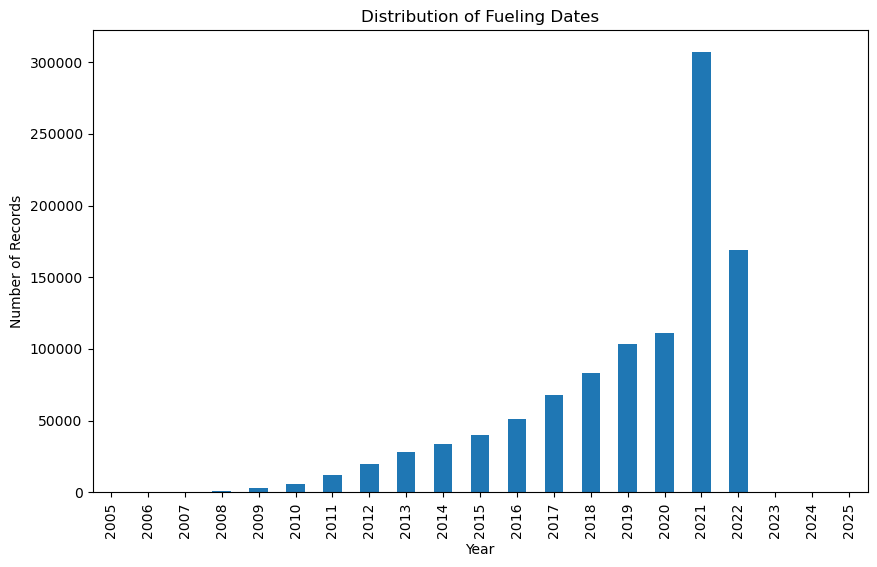

In [47]:
import matplotlib.pyplot as plt

# Drop missing values
valid_dates = df['date_fueled_cleaned'].dropna()

plt.figure(figsize=(10,6))
valid_dates.dt.year.value_counts().sort_index().plot(kind='bar')

plt.title("Distribution of Fueling Dates")
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.show()


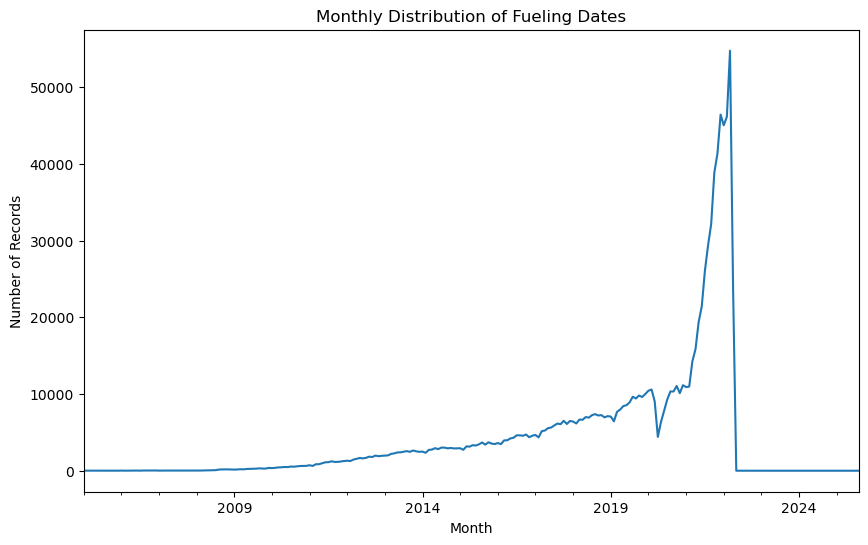

In [48]:
valid_dates.dt.to_period("M").value_counts().sort_index().plot(figsize=(10,6))

plt.title("Monthly Distribution of Fueling Dates")
plt.xlabel("Month")
plt.ylabel("Number of Records")
plt.show()



### 1.2 Numeric Fields
1. Identify the **percentage missing** for **`gallons`**, **`miles`**, and **`odometer`**. **[3]**  
2. Use the interdependence among **`miles`**, **`gallons`**, and **`mpg`** to **impute a missing value** when the other two are present. **[3]**  
3. **Convert** `miles`, `gallons`, `odometer`, etc., from strings/objects to **floats**, handling commas and other formatting. **[5]**  
4. **Plot distributions** for these numeric fields and **comment** on their shapes and any anomalies. **[3]**  
5. Compute and interpret a **statistical summary** (mean, standard deviation, min, max, most frequent value, quartiles). **Assess whether the results make sense.** **[3]**

In [50]:
numeric_cols = ['gallons', 'miles', 'odometer']

missing_report = df[numeric_cols].isna().mean() * 100  # percentage
missing_report = missing_report.round(2)  # round to 2 decimals

print("Q1.2.1 Missing Percentages:")
print(missing_report)


Q1.2.1 Missing Percentages:
gallons      6.32
miles       87.55
odometer    12.70
dtype: float64


In [52]:
# Convert to numeric (force errors to NaN)
for col in ['miles', 'gallons', 'mpg']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [53]:
# Impute mpg
mask = df['mpg'].isna() & df['miles'].notna() & df['gallons'].notna()
df.loc[mask, 'mpg'] = df.loc[mask, 'miles'] / df.loc[mask, 'gallons']

# Impute miles
mask = df['miles'].isna() & df['mpg'].notna() & df['gallons'].notna()
df.loc[mask, 'miles'] = df.loc[mask, 'mpg'] * df.loc[mask, 'gallons']

# Impute gallons
mask = df['gallons'].isna() & df['miles'].notna() & df['mpg'].notna()
df.loc[mask, 'gallons'] = df.loc[mask, 'miles'] / df.loc[mask, 'mpg']


In [54]:
print("Remaining missing values after imputation:")
print(df[['miles', 'gallons', 'mpg']].isna().sum())


Remaining missing values after imputation:
miles      74276
gallons    74273
mpg        74213
dtype: int64


3. **Convert** `miles`, `gallons`, `odometer`, etc., from strings/objects to **floats**, handling commas and other formatting. **[5]**  


In [55]:
# Columns to clean
num_cols = ['miles', 'gallons', 'odometer']

for col in num_cols:
    # Remove commas, spaces, and any stray characters
    df[col] = (
        df[col]
        .astype(str)                      # ensure string for cleaning
        .str.replace(',', '', regex=True) # remove commas
        .str.replace(r'[^0-9.\-]', '', regex=True) # keep only digits, dot, minus
    )
    
    # Convert to float (invalid entries → NaN)
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [56]:
print(df[num_cols].dtypes)  # should all be float64
print(df[num_cols].head())


miles       float64
gallons     float64
odometer    float64
dtype: object
      miles  gallons  odometer
0       NaN      NaN   73370.0
1  382.9920   12.120   11983.0
2  227.7435    7.991   98233.0
3  494.9100   10.575  163802.0
4  244.4000   11.651       NaN


4. **Plot distributions** for these numeric fields and **comment** on their shapes and any anomalies. **[3]**  


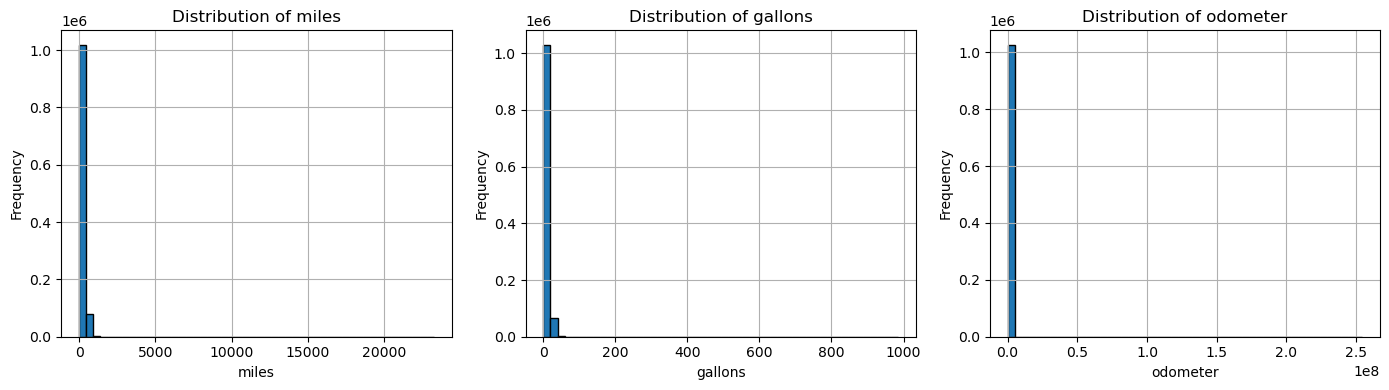

In [57]:
import matplotlib.pyplot as plt

num_cols = ['miles', 'gallons', 'odometer']

plt.figure(figsize=(14, 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    df[col].dropna().hist(bins=50, edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


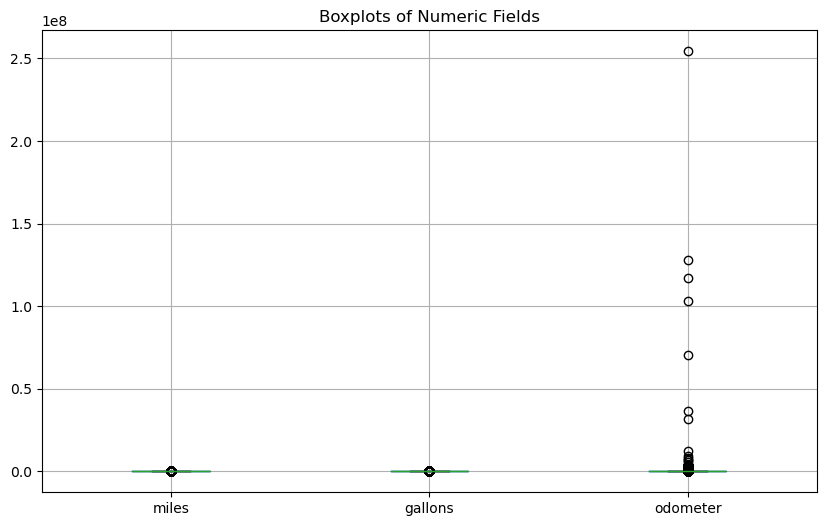

In [58]:
plt.figure(figsize=(10,6))
df[num_cols].boxplot()
plt.title("Boxplots of Numeric Fields")
plt.show()


5. Compute and interpret a **statistical summary** (mean, standard deviation, min, max, most frequent value, quartiles). **Assess whether the results make sense.** **[3]**

In [59]:
# Standard statistical summary
summary = df[['miles', 'gallons', 'odometer']].describe().T

# Add mode (most frequent value)
summary['mode'] = df[['miles', 'gallons', 'odometer']].mode().iloc[0]

print(summary)


              count           mean            std  min          25%  \
miles     1100594.0     264.561438     191.091120  0.0    181.36515   
gallons   1100597.0      12.385295       6.818451  0.0      8.99000   
odometer  1025716.0  103996.001856  340525.205257  0.0  45920.00000   

                 50%         75%           max    mode  
miles       267.0304     342.722  2.323840e+04   0.000  
gallons      11.9540      14.938  9.847100e+02  10.567  
odometer  91882.0000  146922.000  2.543621e+08   1.000  


interpretation